# Exploration du Dataset 

import des dataset

In [2]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

import src.dataset as dataset_module

from importlib import reload
dataset_module = reload(dataset_module)

df_test, df_train, df_val = dataset_module.load_df_train_test_val()
df = dataset_module.load_df()



taille des split

In [3]:
df_train.value_counts()
df_val.value_counts()
df_test.value_counts()


filename  style  artist  genre  style_name                  artist_name        genre_name        
999.jpg   23     7       3      Romanticism                 gustave-dore       illustration          1
1000.jpg  13     0       8      Mannerism_Late_Renaissance  Unknown Artist     sketch_and_study      1
1003.jpg  8      0       6      Early_Renaissance           Unknown Artist     portrait              1
101.jpg   3      0       1      Art_Nouveau                 Unknown Artist     cityscape             1
1010.jpg  23     35      6      Romanticism                 francisco-goya     portrait              1
                                                                                                    ..
1127.jpg  21     10      4      Realism                     ivan-shishkin      landscape             1
1136.jpg  18     0       4      Pointillism                 Unknown Artist     landscape             1
1138.jpg  4      80      7      Baroque                     peter-paul-rubens 

repartitiond es styles

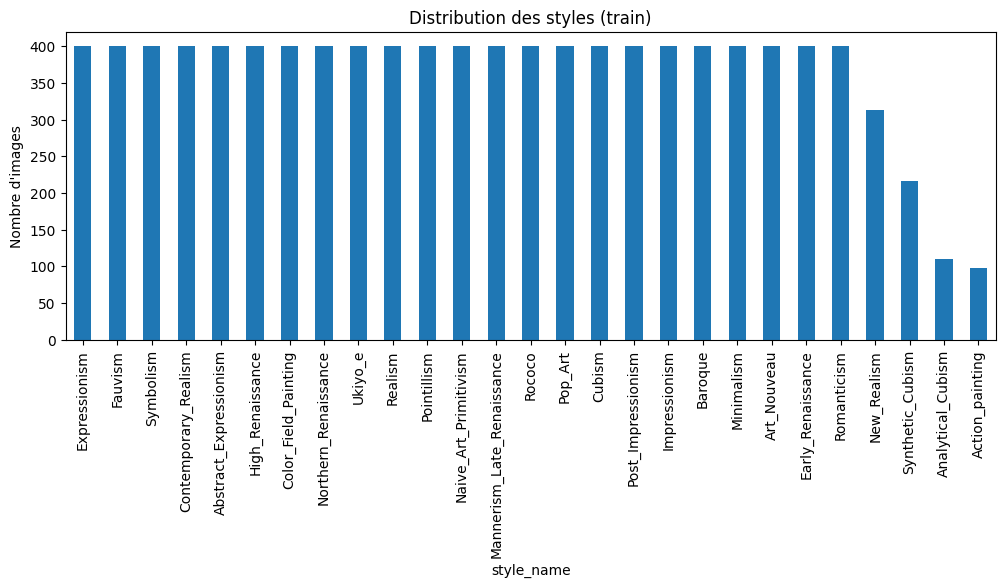

In [4]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12,4))
df["style_name"].value_counts().plot.bar()
plt.title("Distribution des styles (train)")
plt.ylabel("Nombre d'images")
plt.show()


repartition des genres

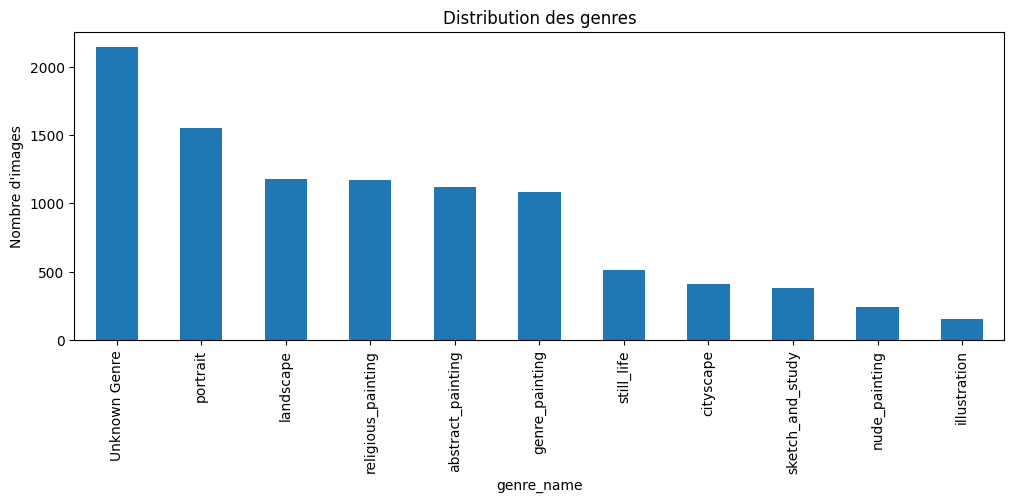

In [5]:
df["genre_name"].value_counts().head(10)
plt.figure(figsize=(12,4))
df["genre_name"].value_counts().plot.bar()
plt.title("Distribution des genres")
plt.ylabel("Nombre d'images")
plt.show()


nb artiste par style

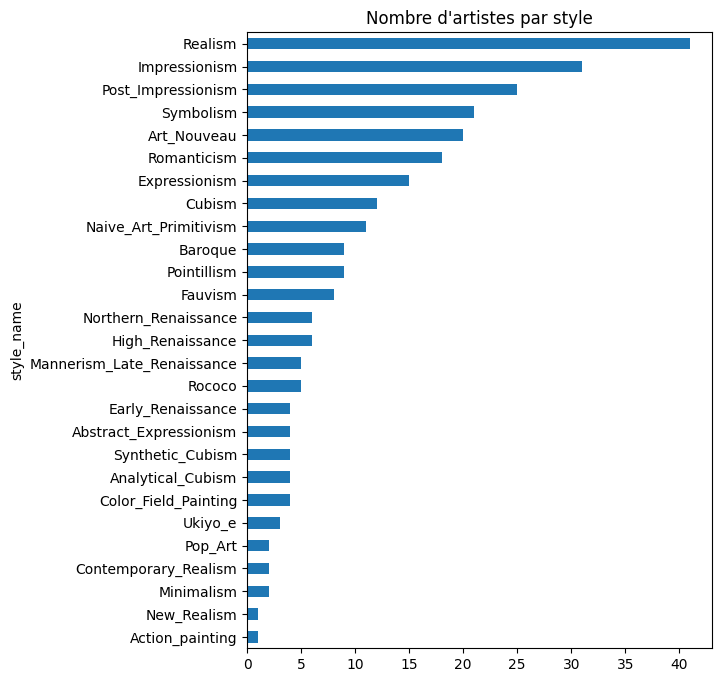

In [6]:
artists_per_style = (
    df
    .groupby("style_name")["artist_name"]
    .nunique()
    .sort_values()
)

artists_per_style.plot.barh(figsize=(6,8))
plt.title("Nombre d'artistes par style")
plt.show()


artistes dominants :

In [7]:
df["artist_name"].value_counts().head(15)

artist_name
Unknown Artist        6410
pablo-picasso          174
nicholas-roerich       158
juan-gris              131
marc-chagall           128
albrecht-durer         118
georges-braque         100
vincent-van-gogh        87
pyotr-konchalovsky      77
utagawa-kuniyoshi       70
georges-seurat          65
rembrandt               62
tintoretto              61
camille-pissarro        59
katsushika-hokusai      58
Name: count, dtype: int64

style dominées par qq artistes

In [8]:
style = df["style_name"].unique()[0]

df[df["style_name"] == style]["artist_name"].value_counts().head(5)


artist_name
pablo-picasso     50
georges-braque    37
juan-gris         14
Unknown Artist     9
Name: count, dtype: int64

chevauchement artiste entre split

In [9]:
train_artists = set(df_train["artist"])
val_artists   = set(df_val["artist"])
test_artists  = set(df_test["artist"])

len(train_artists & val_artists), len(train_artists & test_artists)


(110, 109)

visualisation du dataset

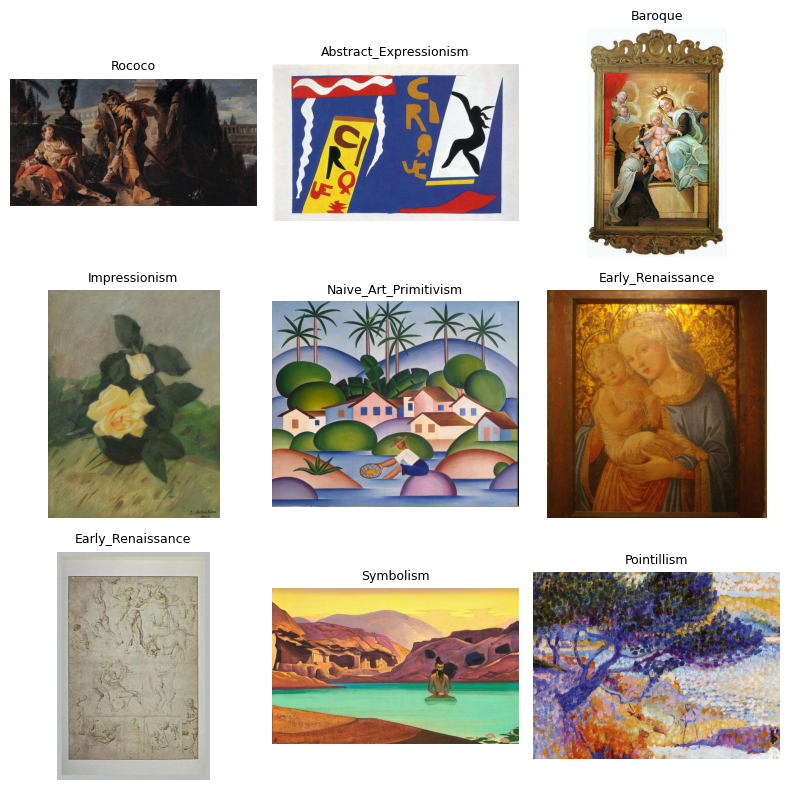

In [10]:
import matplotlib.pyplot as plt
from src.dataset import load_image

sample = df_train.sample(9, random_state=42)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax, (_, row) in zip(axes.flatten(), sample.iterrows()):
    img = load_image(row, split="train")
    ax.imshow(img)
    ax.set_title(row["style_name"], fontsize=9)
    ax.axis("off")

plt.tight_layout()
plt.show()


variabilité intrastyle

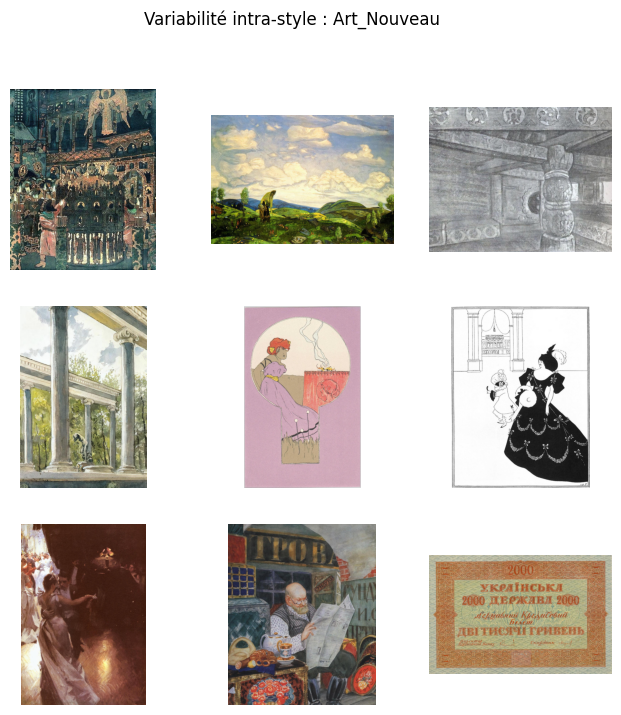

In [16]:
style = df_train["style_name"].unique()[24]
sample = df_train[df_train["style_name"] == style].sample(9)

fig, axes = plt.subplots(3, 3, figsize=(8,8))
for ax, (_, row) in zip(axes.flatten(), sample.iterrows()):
    ax.imshow(load_image(row))
    ax.axis("off")
plt.suptitle(f"Variabilité intra-style : {style}")
plt.show()


comparaison inter style

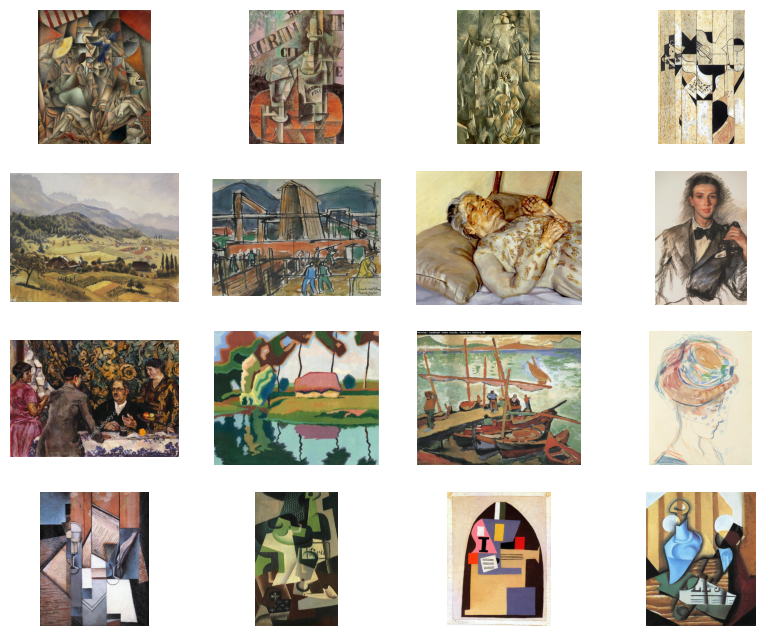

In [12]:
styles = df_train["style_name"].unique()[:4]
fig, axes = plt.subplots(len(styles), 4, figsize=(10,8))

for i, style in enumerate(styles):
    samples = df_train[df_train["style_name"] == style].sample(4)
    for j, (_, row) in enumerate(samples.iterrows()):
        axes[i, j].imshow(load_image(row))
        axes[i, j].axis("off")
    axes[i,0].set_ylabel(style)

plt.show()


artistes/style/genre manquants

In [13]:
# NAN
def missing_stats(df, col):
    total = len(df)
    missing = df[col].isna().sum()
    pct = 100 * missing / total
    return missing, pct

for col in ["artist_name", "genre_name", "style_name"]:
    m, p = missing_stats(df, col)
    print(f"{col}: {m} manquants ({p:.2f}%)")

# unknown
def unknown_stats(df, col,name):
    total = len(df)
    unknown = (df[col].str.lower() == name).sum()
    pct = 100 * unknown / total
    return unknown, pct

for col in ["artist_name", "genre_name"]:
    u, p = unknown_stats(df, col, "0" if col=="artist_name" else "Unknown Genre")
    print(f"{col}: {u} unknown ({p:.2f}%)")



artist_name: 0 manquants (0.00%)
genre_name: 0 manquants (0.00%)
style_name: 0 manquants (0.00%)
artist_name: 0 unknown (0.00%)
genre_name: 0 unknown (0.00%)
